# Logistic Regression vs RandomForest on Liver Disease Dataset

From the dataset on liver diseases [Predict Liver Disease: 1700 Records Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset), it would be interesting to employ a Machine Learning model to predict the occurrence of the disease based on the data collected from the features and to assess how different features influence the outcome of our target variable, 'Disease'.

## Variables
- Age: Range: 20 to 80 years.
- Gender: Male (0) or Female (1).
- BMI (Body Mass Index): Range: 15 to 40.
- Alcohol Consumption: Range: 0 to 20 units per week.
- Smoking: No (0) or Yes (1).
- Genetic Risk: Low (0), Medium (1), High (2).
- Physical Activity: Range: 0 to 10 hours per week.
- Diabetes: No (0) or Yes (1).
- Hypertension: No (0) or Yes (1).
- Liver Function Test: Range: 20 to 100.
- Diagnosis: Binary indicator (0 or 1) of liver disease presence.

## Dataset Import and Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import numpy as np 

In [7]:
data = pd.read_csv('Liver_disease_data.csv')
data.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.394118,17.641915,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1700.0,0.504118,0.500130,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,1700.0,27.699801,7.210400,15.004710,21.455414,27.925367,33.957668,39.992845
AlcoholConsumption,1700.0,9.832309,5.757472,0.003731,4.841811,9.828195,14.871671,19.952456
Smoking,1700.0,0.291765,0.454708,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1700.0,0.521765,0.666262,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1700.0,5.000993,2.847074,0.001852,2.622121,5.022883,7.401642,9.994964
Diabetes,1700.0,0.142353,0.349515,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,1700.0,0.154706,0.361730,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,1700.0,59.863867,22.996262,20.019254,40.024216,59.513146,79.428755,99.991413


In [13]:
data.duplicated().any()

False

The dataset is already in an excellent format, with no missing values or duplicates. There is no need for One-Hot Encoding or LabelEncoder either, as the categorical variables have already been converted to numerical/boolean format.

I perform Exploratory Data Analysis (EDA) on the quantitative variables of the Liver Disease dataset to better understand the distribution of key features in relation to the target variable, Diagnosis. This approach might help identifying patterns, anomalies, and relationships between variables that can guide further modeling decisions.

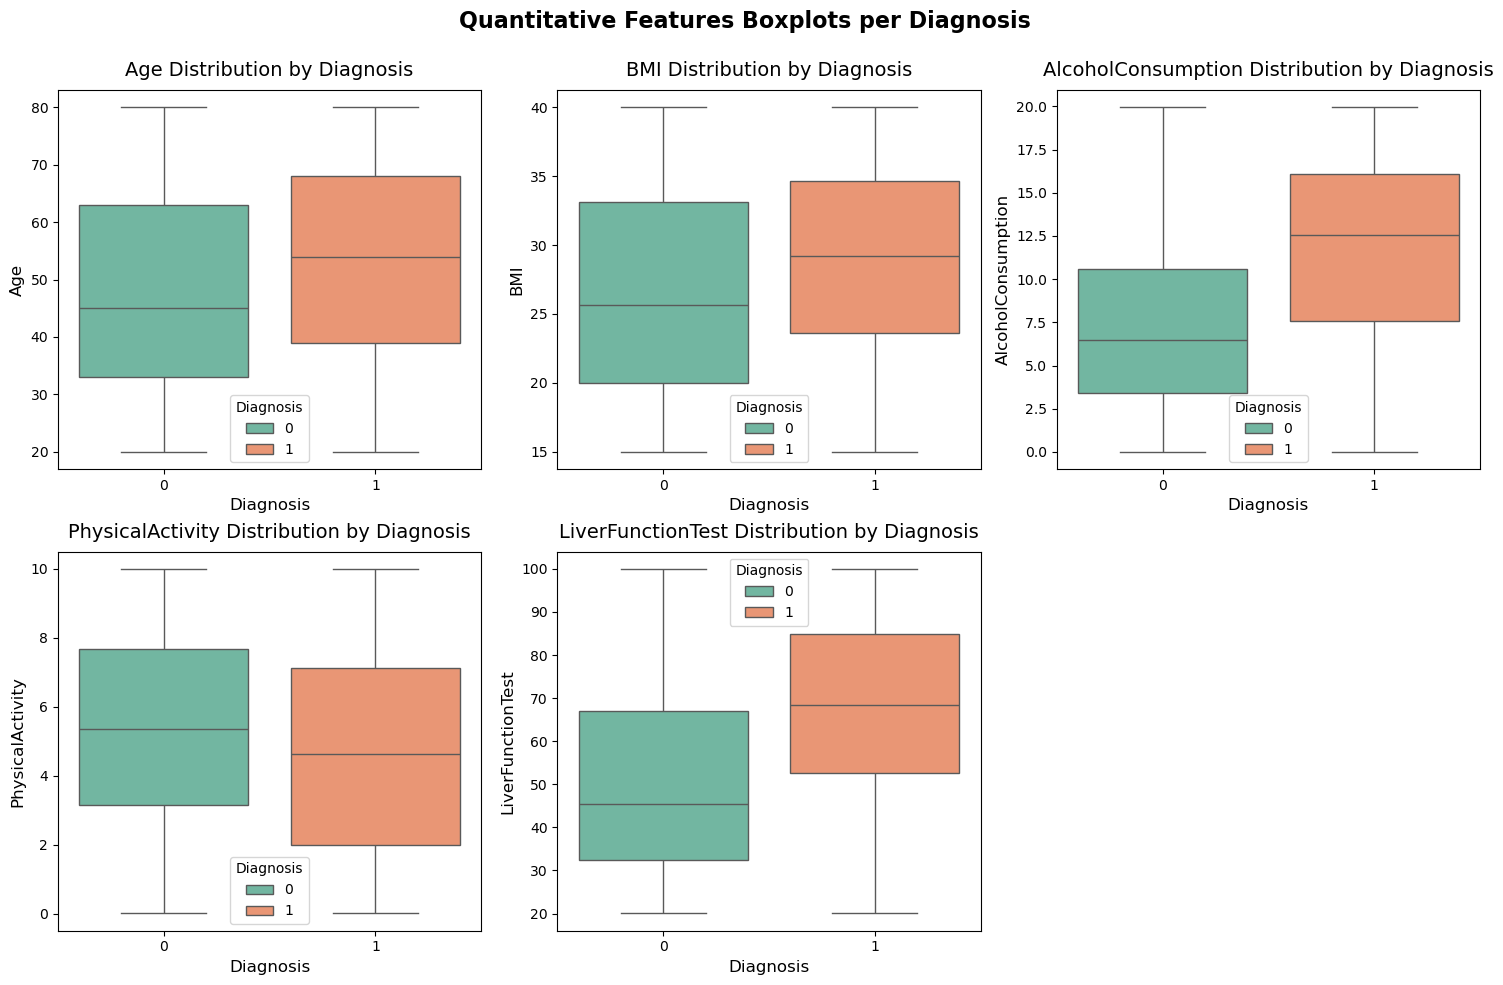

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']

n_cols = 3
n_rows = -(-len(continuous_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_columns):
    sns.boxplot(data=data, x='Diagnosis', y=col, hue='Diagnosis', palette="Set2", ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Diagnosis', fontsize=14, pad=10)
    axes[i].set_xlabel('Diagnosis', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

for j in range(len(continuous_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Quantitative Features Boxplots per Diagnosis', fontsize=16, fontweight='bold')
plt.show()

As shown by the boxplots of the distribution of the variable Diagnosis (0 = absence of disease and 1 = presence of disease) in relation to the different quantitative features of our dataset, it can be observed that, except for the feature 'Physical Activity', higher levels of the features generally tend to indicate a likelihood of the outcome leaning more towards 1 = presence of the disease.

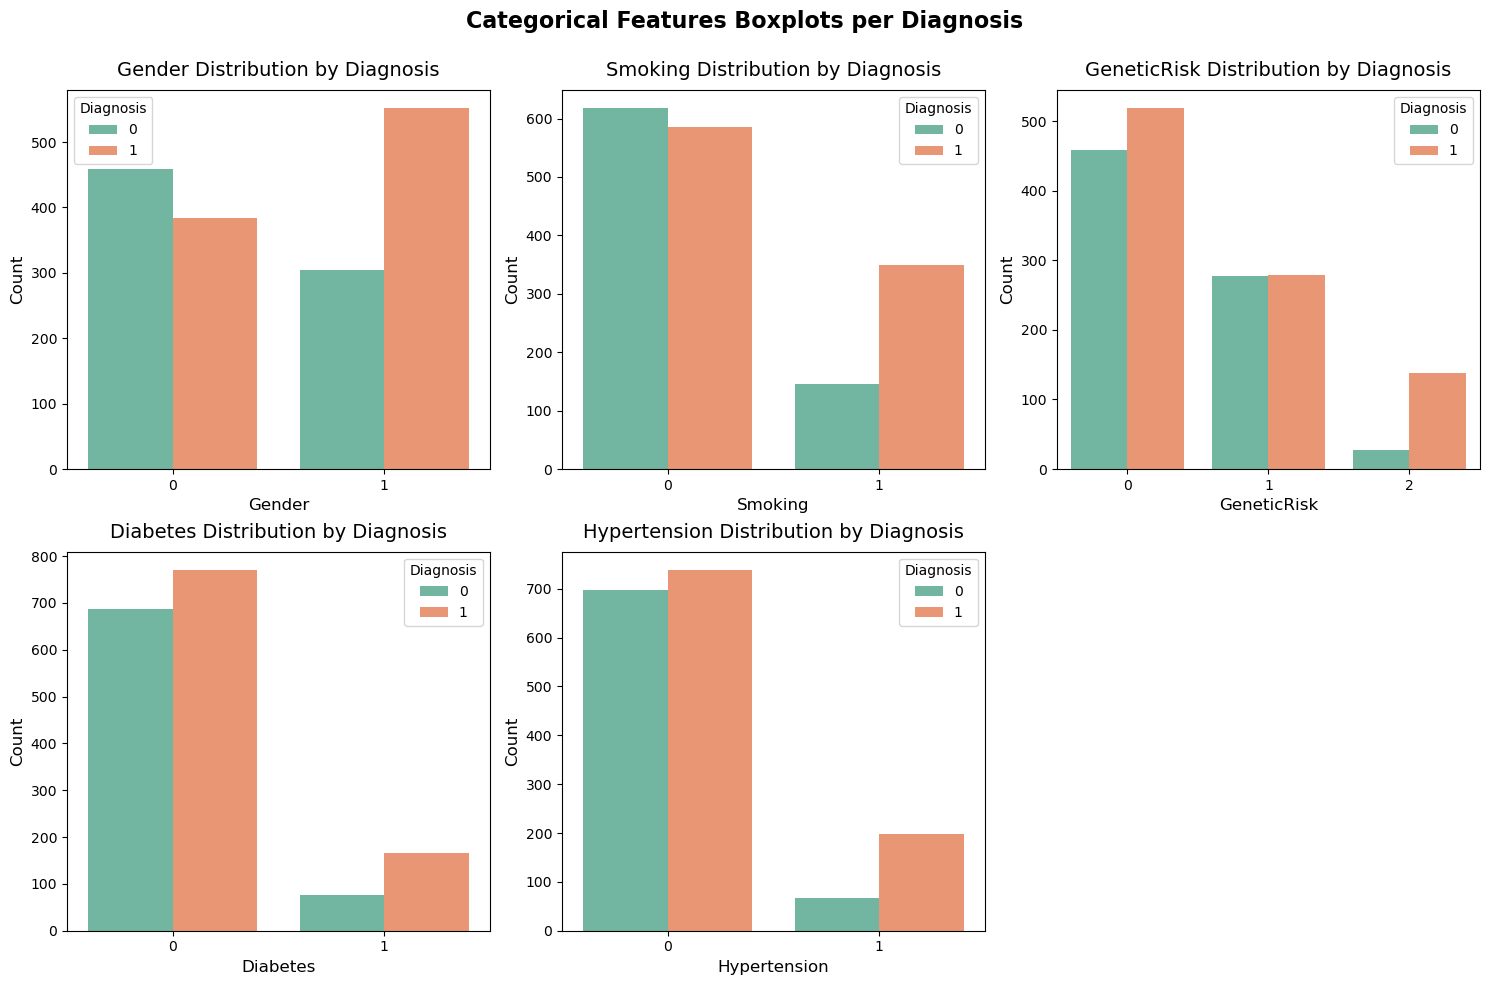

In [20]:
categorical_columns = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension']

n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, hue='Diagnosis', palette="Set2", ax=axes[i], dodge=True)
    axes[i].set_title(f'{col} Distribution by Diagnosis', fontsize=14, pad=10)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].get_legend().set_title('Diagnosis')

for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Categorical Features Boxplots per Diagnosis', fontsize=16, fontweight='bold')
plt.show()

The barplots display the number of observations for the categorical features present in the dataset. Starting from the top left, these boxplots highlight a notable prevalence of females affected by the disease. Additionally, we can infer and hypothesize an interesting implication of smoking as a factor in the positive prognosis of the disease. The distribution of genetic risk reflects the individual values in the dataset. This factor, along with the prevalence of affected females and all other features, will be considered for stratifying the dataset for the training and testing of our model.

In [23]:
counts = data['Diagnosis'].value_counts()
counts
print(f'''Out of the 1700 observations in the dataset's starting population, 
{counts[1]} are sick and {counts[0]} are healthy individuals: ''')
counts

Out of the 1700 observations in the dataset's starting population, 
936 are sick and 764 are healthy individuals: 


Diagnosis
1    936
0    764
Name: count, dtype: int64

In [25]:
X = data.drop('Diagnosis', axis=1)
y = data["Diagnosis"]

## Logistic Regression on the dataset

After dividing the dataset in his features and the target variable (Diagnosis Yes, 1, or No, 0) we can continue with the train_test_split requested by the model.

It is now possible to define the Logistic Regression model: I first set up a k-fold cross-validation to consider 5 different splits of the dataset and evaluate the best combination. Once the dataset is divided into training and testing features, and training and testing targets (stratified by y), I set up a Pipeline which, in conjunction with GridSearchCV, will allow us to find the best parameters for the model. The steps of the Pipeline are as follows: polynomial transformation to find the best degree (polynomial degree), standard scaling for all features (to bring them onto the same homogeneous scale, the normal scale), and finally the choice of the classifier to build this model, in this case, LogisticRegression(). For this model, the best hyperparameters are evaluated and considered, specifically the different polynomial degrees to be added to the features and the C parameter for the regularization of logistic regression.

In [30]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

kf = KFold(shuffle = True, random_state = 42, n_splits = 5)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

estimator_lr = Pipeline([
    ("polynomial_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(solver = "lbfgs", max_iter = 10000))])

params_lr = {
    "polynomial_features__degree": [1,2,3,4],
    "log_reg__C": np.geomspace(1e-3, 1e3, num = 10)
}

grid_lr = GridSearchCV(estimator_lr, params_lr, cv = kf, scoring = "accuracy")

grid_lr.fit(X_train_lr, y_train_lr)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'log_reg__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'polynomial_features__degree': [1, 2, 3, 4]},
             scoring='accuracy')

In [32]:
print("Best parameters: ", grid_lr.best_params_)
print("Best score: ", grid_lr.best_score_)

Best parameters:  {'log_reg__C': 2.154434690031882, 'polynomial_features__degree': 2}
Best score:  0.8382352941176471


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       153
           1       0.87      0.80      0.83       187

    accuracy                           0.82       340
   macro avg       0.82      0.83      0.82       340
weighted avg       0.83      0.82      0.82       340



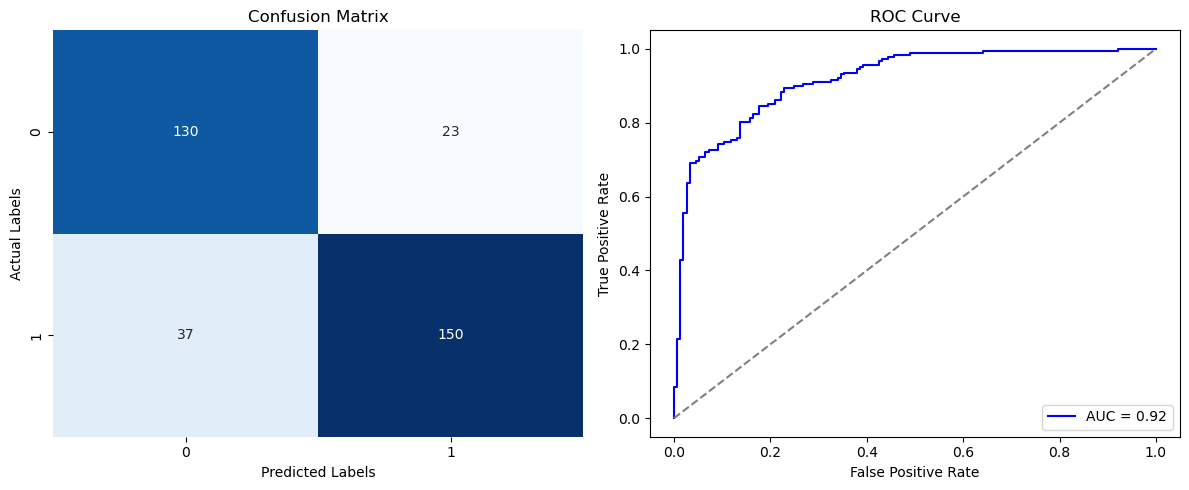

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred_lr = grid_lr.predict(X_test_lr)
y_prob_lr = grid_lr.predict_proba(X_test_lr)[:, 1]

# Confusion Matrix and Classification Report
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
print("Classification Report: \n", classification_report(y_test_lr, y_pred_lr))

# ROC Curve
roc_auc_lr = roc_auc_score(y_test_lr, y_prob_lr)
fpr, tpr, _ = roc_curve(y_test_lr, y_prob_lr)

# Graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("Actual Labels")

# ROC curve
axes[1].plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc_lr:.2f}")
axes[1].plot([0, 1], [0, 1], color="gray", linestyle="--")
axes[1].set_title("ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

As shown by the output of the Classification Report, even with logistic regression, we can observe a good f1-score (0.81), and through model evaluation, we can appreciate the confidence level of our model. We will next employ a new ML model, Random Forest Classifier, to attempt to achieve a higher prediction performance compared to this one.

## RandomForest ML on the dataset

Not fully satisfied with the results obtained from logistic regression, I decided to employ a Random Forest model to predict our target variable, 'Diagnosis'. Additionally, I performed a Lime Analysis on a sample value from the dataset (in this case, the first observation) to examine the implication and weight of each feature in making the prediction, whether the disease is present or not.

In [39]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

estimator_rf = Pipeline([
    ("polynomial_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

params_rf = {
    "polynomial_features__degree": [1, 2],
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth": [None, 10, 20, 30],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ['auto', 'sqrt', 'log2'],
    "rf__bootstrap": [True, False]
}

grid_rf = GridSearchCV(estimator_rf, params_rf, cv=kf, scoring="accuracy", n_jobs=-1)

grid_rf.fit(X_train_rf, y_train_rf)

print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation score:", grid_rf.best_score_)

Best parameters: {'polynomial_features__degree': 1, 'rf__bootstrap': True, 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best cross-validation score: 0.8963235294117646


We can highlight that, once the appropriate hyperparameters are selected, the Random Forest model achieves a better score (0.89, almost 0.9) compared to the previously configured logistic regression model one (0.84).

Confusion Matrix: 
 [[142  11]
 [ 23 164]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       153
           1       0.94      0.88      0.91       187

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340



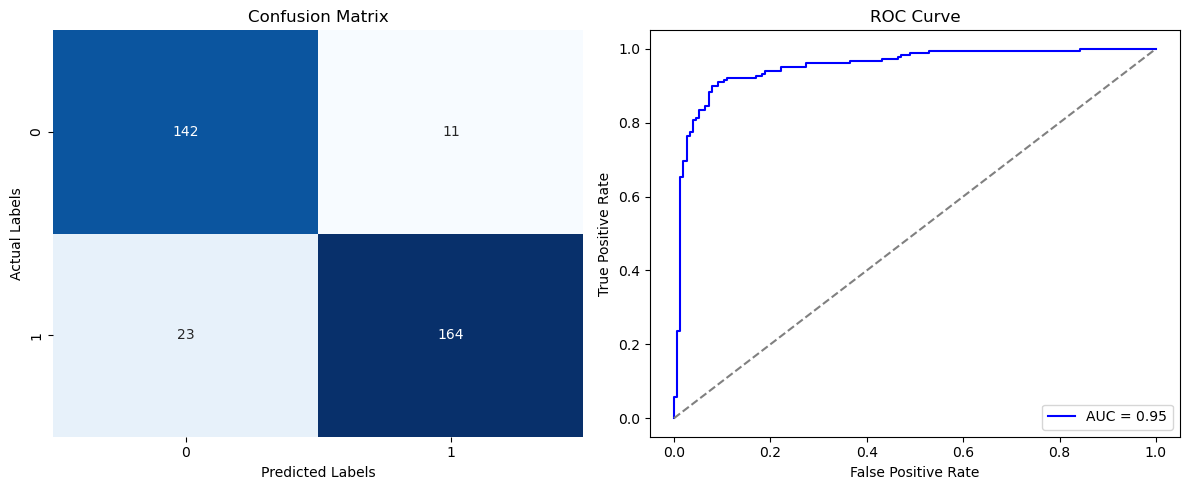

In [42]:
y_pred_rf = grid_rf.predict(X_test_rf)
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

print("Confusion Matrix: \n", cm_rf)
print("Classification Report: \n", classification_report(y_test_rf, y_pred_rf))

y_prob_rf = grid_rf.predict_proba(X_test_rf)[:,1]

roc_auc_rf = roc_auc_score(y_test_rf, y_prob_rf)
fpr, tpr, _ = roc_curve(y_test_rf, y_prob_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("Actual Labels")

# ROC Curve
axes[1].plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc_rf:.2f}")
axes[1].plot([0, 1], [0, 1], color="gray", linestyle="--")
axes[1].set_title("ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## Feature Importances

In [45]:
poly = grid_rf.best_estimator_.named_steps['polynomial_features']
X_poly = poly.transform(X)

feature_names = poly.get_feature_names_out(X.columns)

rf_model = grid_rf.best_estimator_.named_steps['rf']

feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names)

feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

LiverFunctionTest     0.265433
AlcoholConsumption    0.265174
BMI                   0.104359
Age                   0.097650
PhysicalActivity      0.077657
Gender                0.054282
Smoking               0.050951
GeneticRisk           0.045937
Hypertension          0.025982
Diabetes              0.012576
1                     0.000000
dtype: float64


In this last chunk of code we can even identify the most important features for the ML model: LiverFunctionTest, AlcoholConsumption and BMI appeared to be the top three important ones for the algorithm.

## LIME Analysis / Explainer LIME

In [49]:
from lime.lime_tabular import LimeTabularExplainer

scaler = grid_rf.best_estimator_.named_steps['scaler']
X_scaled = scaler.transform(X_poly)

explainer = LimeTabularExplainer(
    training_data=X_scaled,
    feature_names=feature_names,
    class_names=['No Disease', 'Disease'],
    mode='classification',
    discretize_continuous=True
)

# First observation of the dataset (X_scaled) took as the instance to explain
instance_to_explain = X_scaled[0].reshape(1, -1)

explanation = explainer.explain_instance(
    data_row=instance_to_explain[0],
    predict_fn=rf_model.predict_proba
)

explanation.show_in_notebook(show_table=True, show_all=False)

Using the LIME explainer, we can observe how the model is able to predict the outcome of a specific prediction based on the values of the features for the observed individual, for this example I gave the input of the first individual in our dataset (X_scaled[0]). We can see that the model predicts the presence of the disease and analyzes the contribution of the various features that influenced that prediction.